In [109]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='darkgrid')

In [110]:
from itertools import cycle
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import KMeans, SpectralClustering, AffinityPropagation
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import confusion_matrix

In [111]:
centers1 = [[2, 2], [-2, -2], [2, -2]]
centers2 = [[15,7],[4,9],[24,16],[-1,-2]]
centers3 = [[-3,4],[3,3],[4,-5],[-6,-5],[-1,-1]]

In [112]:
X1, y1 = make_blobs(
    n_samples=10000,
    centers=centers1,
    cluster_std=1,
    n_features=2,
    random_state=42)
X2, y2 = make_blobs(
    n_samples=10000,
    centers=centers2,
    cluster_std=1,
    n_features=2,
    random_state=42)
X3, y3 = make_blobs(
    n_samples=10000,
    centers=centers3,
    cluster_std=1,
    n_features=2,
    random_state=42)

In [113]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1, test_size=.8)
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2, test_size=.8)
X_train3,X_test3,y_train3,y_test3 = train_test_split(X3,y3, test_size=.8)

In [114]:
X_trains = [X_train1,X_train2,X_train3] 
X_tests = [X_test1,X_test2,X_test3] 
y_trains = [y_train1,y_train2,y_train3] 
y_tests =  [y_test1,y_test2,y_test3] 

K Means


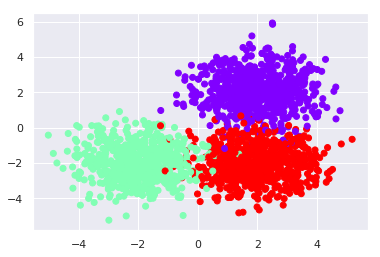

col_0     0     1
row_0            
0         2  2642
1      2663    21
2       576  2096
Means-shift
Number of estimated clusters: 3


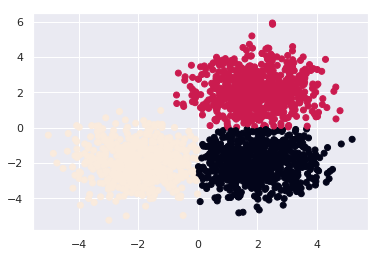

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0       17  672    1
1       16    0  633
2      632   11   18
Spectral Clustering


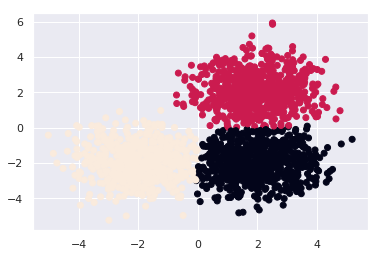

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0       19   17  633
1      670    0   11
2        1  632   17
Affinity Propagation
Damping : 0.55


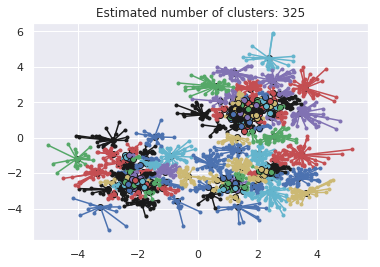

Damping : 0.7


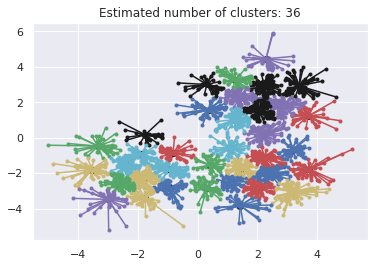

Damping : 0.85


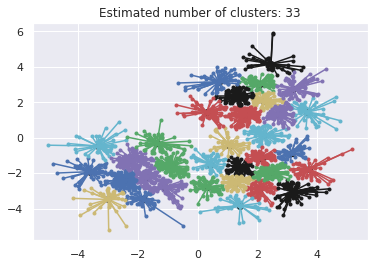

Damping : 0.95


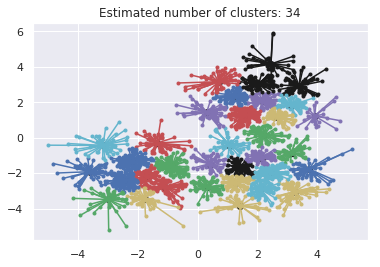

K Means


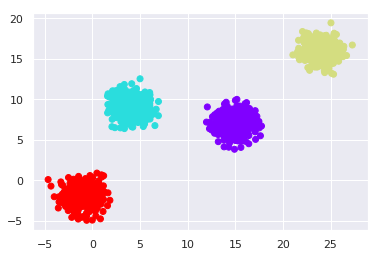

col_0     0     1
row_0            
0      2034     0
1         0  1975
2      1988     0
3         0  2003
Means-shift
Number of estimated clusters: 4


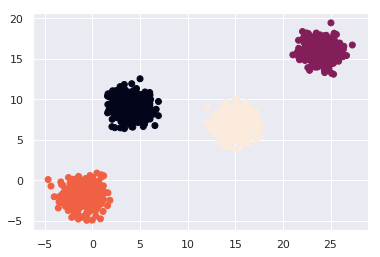

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0        0    0    0  466
1      525    0    0    0
2        0  512    0    0
3        0    0  497    0
Spectral Clustering


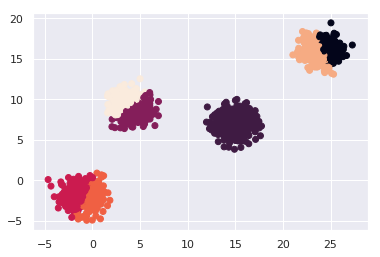

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0        0    0  219    0
1      466    0    0    0
2        0  297    0    0
3        0    0    0  287
4        0    0    0  210
5        0    0  293    0
6        0  228    0    0
Affinity Propagation
Damping : 0.55


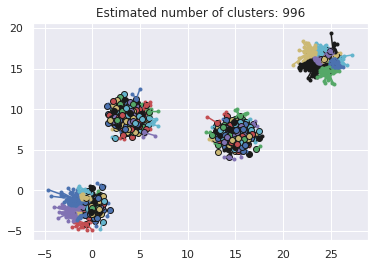

Damping : 0.7


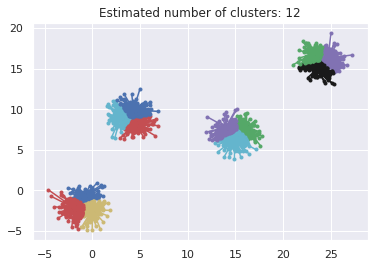

Damping : 0.85


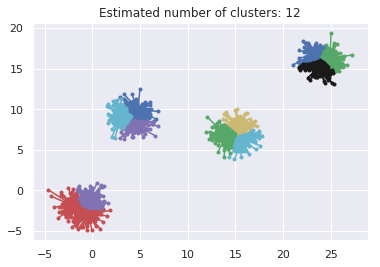

Damping : 0.95


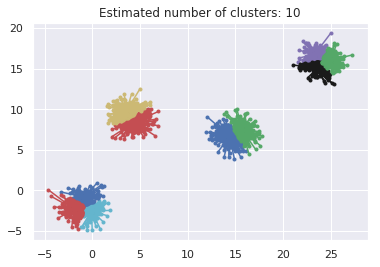

K Means


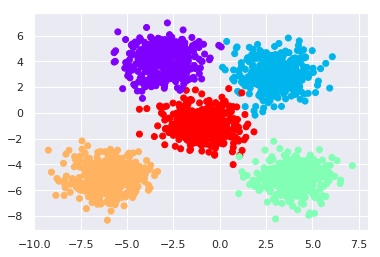

col_0     0     1
row_0            
0         0  1615
1         0  1592
2      1623     0
3      1580     0
4      1147   443
Means-shift
Number of estimated clusters: 5


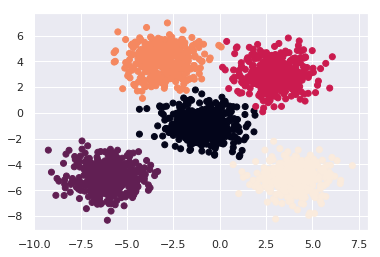

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0        0    0    0  385    0
1        3    0  405    0    0
2        1    0    0    0  376
3        0  420    0    0    0
4      406    0    2    1    1
Spectral Clustering


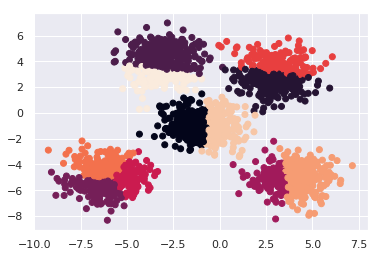

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0        0    0    0    0  231
1        0  241    0    0    2
2      285    1    0    0    0
3        0    0    0  145    0
4        0    0  109    0    1
5        0    0    0  106    0
6        2  164    0    0    0
7        0    0    0  169    0
8        0    0  267    0    0
9        0    2    1    0  172
10      98    0    0    0    4
Affinity Propagation
Damping : 0.55


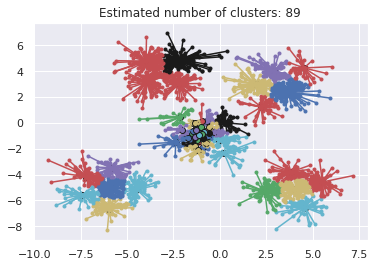

Damping : 0.7


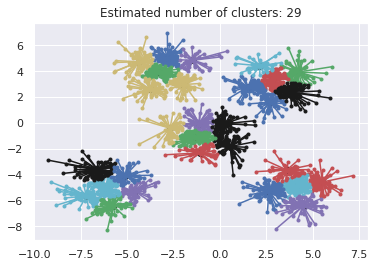

Damping : 0.85


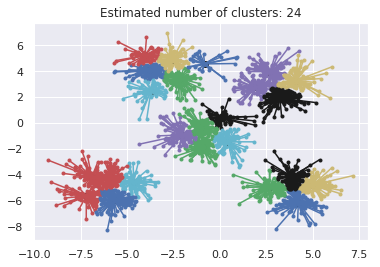

Damping : 0.95


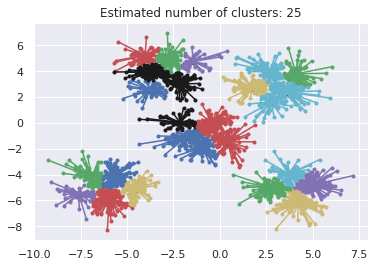

In [115]:

k = 3
for X_train, X_test,y_train,y_test in zip(X_trains,X_tests,y_trains,y_tests):

    #k means
    print('K Means')
    y_pred = KMeans(n_clusters=2,random_state=4452).fit_predict(X_test)
    plt.scatter(X_train[:,0], X_train[:,1],c=y_train, cmap='rainbow')
    plt.show()
    print(pd.crosstab(y_test,y_pred))
    bandwidth = estimate_bandwidth(X_train, quantile=.2, n_samples=500)

    #Means-shift
    print('Means-shift')
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X_train)    
    labels1 = ms.labels_ # Extract cluster assignments for each data point.   
    cluster_centers1 = ms.cluster_centers_  # Coordinates of the cluster centers.    
    n_clusters1_ = len(np.unique(labels1)) # Count our clusters.
    print("Number of estimated clusters: {}".format(n_clusters1_))    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=labels1)
    plt.show()
    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y_train,labels1))

    #Spectral Clustering

    print('Spectral Clustering')
    sc = SpectralClustering(n_clusters=k)
    sc.fit(X_train)
    y_pred = sc.fit_predict(X_train)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
    plt.show()

    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y_pred,y_train))


    print('Affinity Propagation')
    for i in [.55,.70,.85,.95]:
        af = AffinityPropagation(damping=i).fit(X_train)
        cluster_centers_indices = af.cluster_centers_indices_
        n_clusters2_ = len(cluster_centers_indices)
        labels2 = af.labels_
        print('Damping : {}'.format(i))


        plt.figure(1)
        plt.clf()

        # Cycle through each cluster and graph them with a center point for the
        # exemplar and lines from the exemplar to each data point in the cluster.
        colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
        for i, col in zip(range(n_clusters2_), colors):
            class_members = labels2 == i
            cluster_center = X_train[cluster_centers_indices[i]]
            plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
            plt.plot(cluster_center[0],
                     cluster_center[1],
                     'o',
                     markerfacecolor=col,
                     markeredgecolor='k')
            for x in X_train[class_members]:
                plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

        plt.title('Estimated number of clusters: {}'.format(n_clusters2_))
        plt.show()
        k = k + 1